<a href="https://colab.research.google.com/github/singh97kishan/TensorFlow/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SINGLE LAYER LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
dataset , info = tfds.load('imdb_reviews/subwords8k' , with_info=True , as_supervised= True)
train,test = dataset['train'] , dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3UM1ZF/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3UM1ZF/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3UM1ZF/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer= info.features['text'].encoder

In [4]:
buffer_size=10000
batch_size=64
train = train.shuffle(buffer_size)
train = train.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(train))
test=test.padded_batch(batch_size ,tf.compat.v1.data.get_output_shapes(test))

In [5]:
model=tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size ,64),
                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                     tf.keras.layers.Dense(64 , activation='relu'),
                     tf.keras.layers.Dense(1 , activation='sigmoid')
                     ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
history = model.fit(train , epochs=5 , validation_data=test)

Epoch 1/5
391/391 [==============================] - 60s 153ms/step - loss: 0.6675 - accuracy: 0.6038 - val_loss: 0.5530 - val_accuracy: 0.7360
Epoch 2/5
391/391 [==============================] - 61s 155ms/step - loss: 0.4535 - accuracy: 0.7961 - val_loss: 0.5434 - val_accuracy: 0.7314
Epoch 3/5
391/391 [==============================] - 61s 155ms/step - loss: 0.3735 - accuracy: 0.8453 - val_loss: 0.4486 - val_accuracy: 0.8011
Epoch 4/5
391/391 [==============================] - 60s 155ms/step - loss: 0.3322 - accuracy: 0.8619 - val_loss: 0.5519 - val_accuracy: 0.7342
Epoch 5/5
391/391 [==============================] - 60s 153ms/step - loss: 0.5617 - accuracy: 0.7154 - val_loss: 0.6646 - val_accuracy: 0.6109


In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

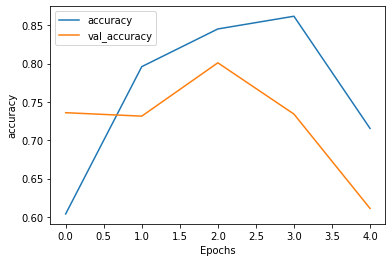

In [10]:
plot_graphs(history, 'accuracy')